In [28]:
import subprocess
import os
import re
import numpy as np
import matplotlib.pyplot as plt

In [36]:
pointsmag=np.linspace(2,6,5) 
numpoints=10**pointsmag #points from 10^2...10^11
errors=np.zeros((np.size(numpoints),1))
pi=np.zeros((np.size(numpoints),1))
for j in range(np.size(numpoints)):
    p = subprocess.Popen(['/home/aspa/Documents/test/a.out'], stdout=subprocess.PIPE, stdin=subprocess.PIPE)

    value=str(numpoints[j]) +'\n'+str(numpoints[j]) + '\n'
    value=bytes(value, 'UTF-8')  # Needed in Python 3.
  
    result, _ = p.communicate(input=value)
    
    # Decode and process the result
    result =result.decode("utf-8").strip().split('\n')
    print(result)

    matches = re.findall(r'[\d+\.\d+]+', result[0])
    pi[j]=float(matches[1])
    errors[j]=abs((np.pi-pi[j])/np.pi) #take np.pi as the real value of pi

            

['With 100 points pi is estimated as 3.44']
['With 1000 points pi is estimated as 3.168']
['With 10000 points pi is estimated as 3.1584']
['With 100000 points pi is estimated as 3.14984']
['With 1000000 points pi is estimated as 3.1432']


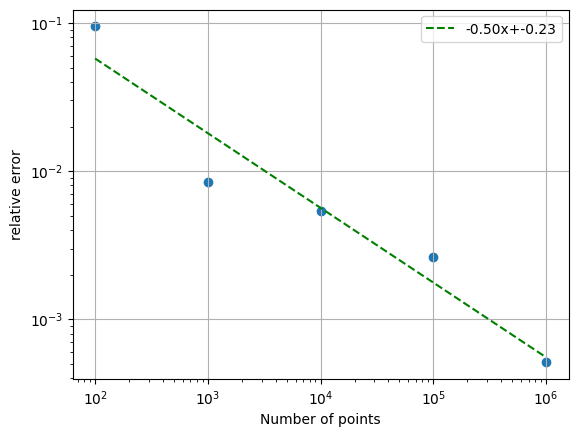

In [37]:
f=plt.plot()
fitlin = np.polyfit(np.log10(numpoints), np.log10(errors), 1) #fit a line in a loglog scatter plot

plt.scatter(numpoints,errors)

plt.plot(numpoints,10**(fitlin[0] *np.log10(numpoints) + fitlin[1]), 'g--',label=f'{fitlin[0][0]:2.2f}x+{fitlin[1][0]:2.2f}')
plt.xlabel('Number of points')
plt.ylabel('relative error')
plt.grid()
plt.loglog()
plt.legend()
plt.show()


In [38]:
print(f'The convergence rate of Monte Carlo method in this implementation is {-fitlin[0][0]:2.2f}.')

The convergence rate of Monte Carlo method in this implementation is 0.50.
